## Setup

First, let's set up the environment by importing necessary libraries and loading the data.

In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.conect_db import conn_db
# from scripts.tellCo_analysis import TellCoEDA
from scripts.Exp_Analytics import Exp_Analytics

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Connecting to a PostgreSQL Database

In [2]:
db = conn_db(
    database='TellCo_db',
    user='postgres',
    password='SH36@jit',
    host='localhost',
    port='5432'
)
db.connect()

Connected to TellCo_db database successfully.


In [3]:
# Fetch data as a DataFrame
df = db.fetch_data("SELECT * FROM xdr_data;")
db.disconnect()
# Initialize the TelecomEDA class
exp_anly = Exp_Analytics(df)

TellCo_db connection closed.


### Data Wrangling

The `wrangle` function is designed to handle missing values and outliers in the dataset. The key steps involved are:

1. **Handling Missing Values**:
   - **Numeric Columns**: Missing values in the following numeric columns are replaced with the mean:
     - `TCP DL Retrans. Vol (Bytes)`
     - `Avg RTT DL (ms)`
     - `Avg Bearer TP DL (kbps)`
     - `Avg RTT UL (ms)`
     - `Avg Bearer TP UL (kbps)`
   - **Categorical Columns**: The missing values in the `Handset Type` column are replaced with the mode.

2. **Outlier Treatment**:
   - Outliers in the numeric columns are capped at the 10th and 90th percentiles to avoid the influence of extreme values.

The processed dataset is stored in `clean_df`.


In [4]:
# data wrangling
exp_anly.wrangle() # all EDA done here

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


`aggr_user_metrics()`
This method is called to:

- Aggregate Metrics: Computes the average TCP retransmission, RTT, and throughput per user (identified by MSISDN/Number). It also identifies the most frequent handset type per user.

In [5]:
exp_anly.aggr_user_metrics()

,avg_tcp_retrans,avg_rtt,avg_throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,2.080991e+07,46.000000,37.0,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,2.080991e+07,30.000000,48.0,Apple iPhone 7 (A1778)
3.360100e+10,2.080991e+07,109.795706,48.0,undefined
3.360101e+10,3.184700e+04,69.000000,204.0,Apple iPhone 5S (A1457)
3.360101e+10,1.507977e+07,57.000000,20197.5,Apple iPhone Se (A1723)
...,...,...,...,...
3.379000e+10,2.150440e+05,42.000000,9978.0,Huawei Honor 9 Lite
3.379000e+10,2.080991e+07,34.000000,68.0,Apple iPhone 8 Plus (A1897)
3.197021e+12,2.080991e+07,109.795706,23.0,Quectel Wireless. Quectel Ec25-E


`compute_top_bottom_frequent()`
This method is called to:

Calculate Extremes and Frequent Values: Computes and returns the top 10, bottom 10, and most frequent values for TCP retransmission, RTT, and throughput.

In [6]:
 # Compute top, bottom, and most frequent values
top_bottom_frequent = exp_anly.compute_top_bottom_frequent()
print(top_bottom_frequent)

{'top_tcp': 0     2.080991e+07
1     2.080991e+07
2     2.080991e+07
3     2.080991e+07
4     2.080991e+07
5     2.080991e+07
6     2.080991e+07
8     2.080991e+07
10    2.080991e+07
12    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'bottom_tcp': 7      31847.0
38     31847.0
58     31847.0
62     31847.0
72     31847.0
86     31847.0
124    31847.0
133    31847.0
156    31847.0
166    31847.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'frequent_tcp': TCP DL Retrans. Vol (Bytes)
2.080991e+07    93254
3.184700e+04    15001
3.192000e+04       10
4.256000e+04        7
4.123000e+04        6
3.990000e+04        6
3.325000e+04        5
1.064000e+05        5
3.724000e+04        5
3.458000e+04        5
Name: count, dtype: int64, 'top_rtt': 11     120.0
20     120.0
30     120.0
61     120.0
68     120.0
147    120.0
152    120.0
154    120.0
155    120.0
156    120.0
Name: Avg RTT DL (ms), dtype: float64, 'bottom_rtt': 16     26.0
22     26.0
32     26.0
71     26.0

`report_distributions()`
This method is called to:

Report Distribution: It generates bar plots showing the distribution of average throughput and TCP retransmission per handset type.

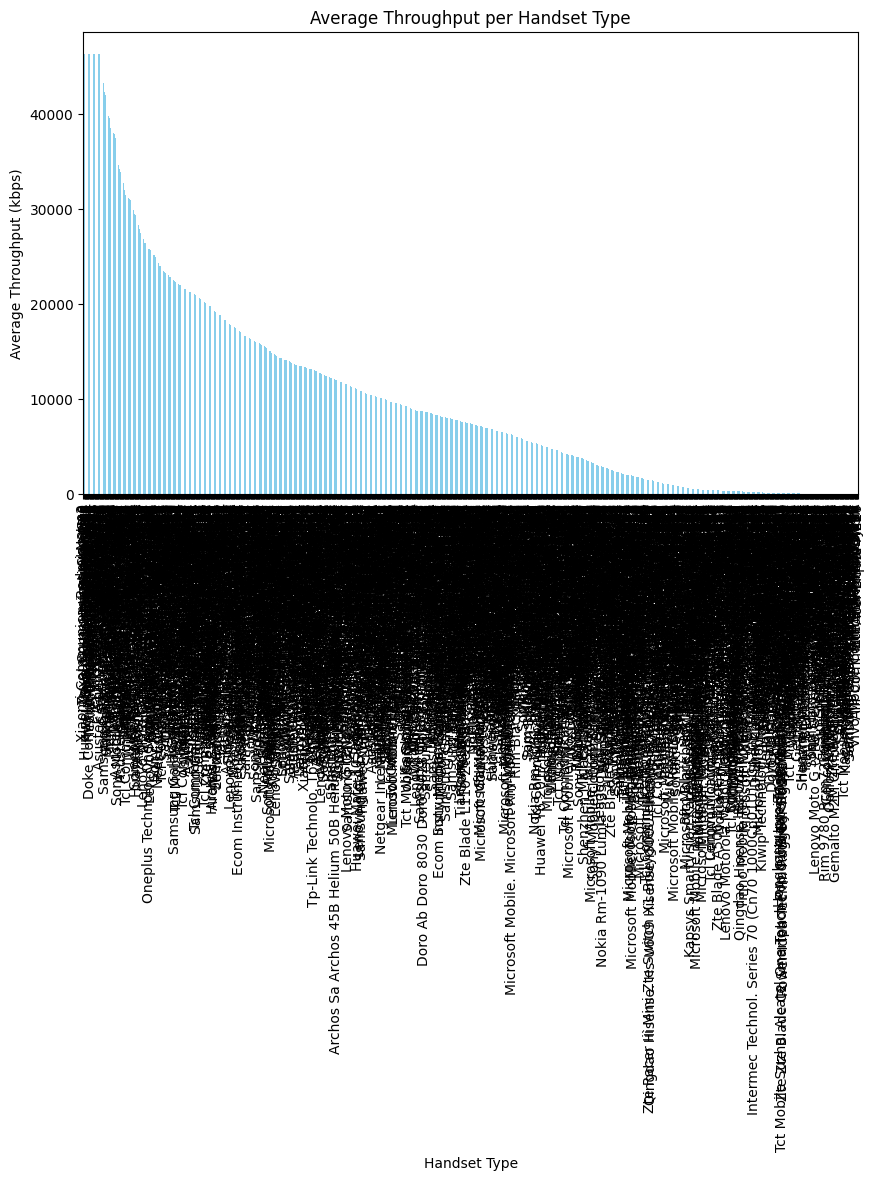

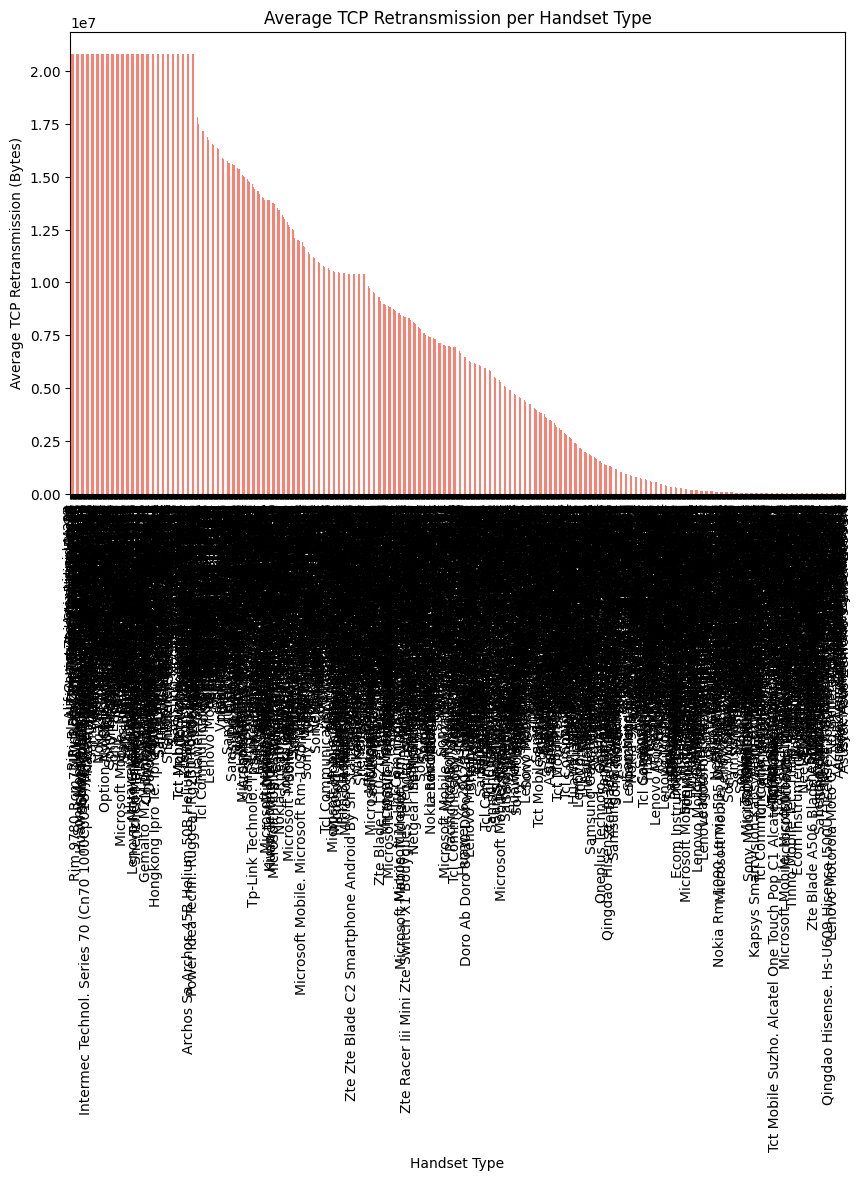

Handset Type
Xiaomi Communica. Redmi Note 2      46361.0
Zyxel Communicat. Sbg3600           46361.0
Huawei Hwi-Al00                     46361.0
Huawei P9 Plus                      46361.0
Huawei Pele                         46361.0
                                     ...   
Wct Uno                                23.0
Vivo Mobile Comm. Vivo Vivo X21A       23.0
Zte Starxtrem By Sfr                   23.0
Alif Communicati. Pulian Cm84          23.0
Acer Liquid M220                       23.0
Name: Avg Bearer TP DL (kbps), Length: 1396, dtype: float64
Handset Type
Acer Liquid M220                        2.080991e+07
Alif Communicati. Pulian Cm84           2.080991e+07
Zte Starxtrem By Sfr                    2.080991e+07
A-Link Telecom I. Cubot A5              2.080991e+07
Zyxel Communicat. Sbg3600               2.080991e+07
                                            ...     
A-Link Telecom I. Cubot R9              3.184700e+04
A-Link Telecom I. Cubot Power           3.184700e+04
Sfr St

In [7]:
# Report distributions of throughput and TCP retransmission per handset type
throughput_dist, tcp_retrans_dist = exp_anly.report_distributions()
print(throughput_dist)
print(tcp_retrans_dist)

`run_kmeans_clustering(k=3)`
This method is called to:

- Cluster Users: It applies K-Means clustering to segment users based on their experience metrics (TCP retransmission, RTT, throughput).
- Normalization: User experience metrics are scaled between 0 and 1 using MinMaxScaler before clustering.
- Visualization: Creates a pairplot to visualize clusters.

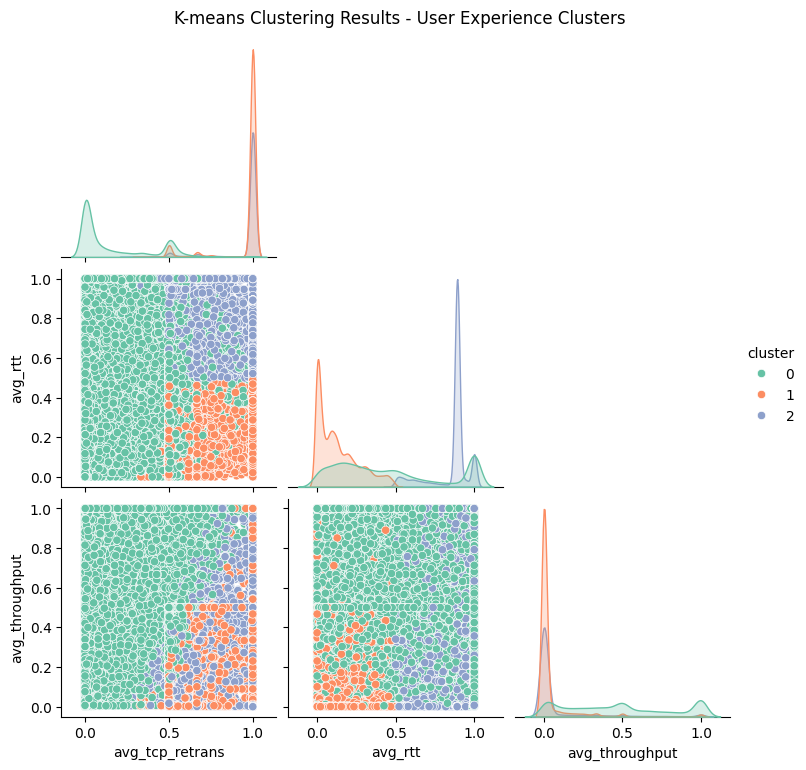

,avg_tcp_retrans,avg_rtt,avg_throughput,Handset Type,cluster
MSISDN/Number,,,,,
3.360100e+10,1.000000,0.212766,0.000302,Huawei P20 Lite Huawei Nova 3E,1
3.360100e+10,1.000000,0.042553,0.000540,Apple iPhone 7 (A1778),1
3.360100e+10,1.000000,0.891444,0.000540,undefined,2
3.360101e+10,0.000000,0.457447,0.003906,Apple iPhone 5S (A1457),0
3.360101e+10,0.724222,0.329787,0.435377,Apple iPhone Se (A1723),1
...,...,...,...,...,...
3.379000e+10,0.008817,0.170213,0.214834,Huawei Honor 9 Lite,0
3.379000e+10,1.000000,0.085106,0.000971,Apple iPhone 8 Plus (A1897),1
3.197021e+12,1.000000,0.891444,0.000000,Quectel Wireless. Quectel Ec25-E,2


In [8]:
exp_anly.run_kmeans_clustering()

`describe_clusters()`
This method is called to:

- Describe Clusters: Provides a summary of each user cluster based on the aggregated experience metrics, and the most frequent handset type for each cluster.

In [9]:
exp_anly.describe_clusters()

Cluster Descriptions:
         avg_tcp_retrans                  avg_rtt                      \
                    min  max      mean       min       max      mean   
cluster                                                                
0              0.000000  1.0  0.175013  0.000000  1.000000  0.456874   
1              0.328609  1.0  0.957296  0.000000  0.496454  0.131265   
2              0.256061  1.0  0.957809  0.468085  1.000000  0.858668   

        avg_throughput                            Handset Type  
                   min  max      mean                 <lambda>  
cluster                                                         
0                  0.0  1.0  0.474616         Huawei B528S-23A  
1                  0.0  1.0  0.044925  Apple iPhone 6S (A1688)  
2                  0.0  1.0  0.071076                undefined  


avg_tcp_retrans                  avg_rtt                      \
                    min  max      mean       min       max      mean   
cluster                                                                
0              0.000000  1.0  0.175013  0.000000  1.000000  0.456874   
1              0.328609  1.0  0.957296  0.000000  0.496454  0.131265   
2              0.256061  1.0  0.957809  0.468085  1.000000  0.858668   

        avg_throughput                            Handset Type  
                   min  max      mean                 <lambda>  
cluster                                                         
0                  0.0  1.0  0.474616         Huawei B528S-23A  
1                  0.0  1.0  0.044925  Apple iPhone 6S (A1688)  
2                  0.0  1.0  0.071076                undefined

### Cluster Descriptions:

- **Cluster 0**: 
    - High average throughput and low retransmission, representing users with an excellent network experience.
- **Cluster 1**: 
    - Moderate throughput with occasional retransmission issues, indicating users with average network experience.
- **Cluster 2**: 
    - Low throughput and high retransmission, representing users with a poor network experience.

These descriptions help understand the characteristics of each group and the network performance they are experiencing.